<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries-and-initialize-main-variables" data-toc-modified-id="Import-libraries-and-initialize-main-variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries and initialize main variables</a></span></li><li><span><a href="#Cleaning-data" data-toc-modified-id="Cleaning-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning data</a></span><ul class="toc-item"><li><span><a href="#Cleaning-AEMET-Data" data-toc-modified-id="Cleaning-AEMET-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cleaning AEMET Data</a></span></li><li><span><a href="#Cleaning-REE-Data" data-toc-modified-id="Cleaning-REE-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cleaning REE Data</a></span></li></ul></li><li><span><a href="#Electric-generation-features-analysis" data-toc-modified-id="Electric-generation-features-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Electric generation features analysis</a></span><ul class="toc-item"><li><span><a href="#Total-Generation" data-toc-modified-id="Total-Generation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Total Generation</a></span></li></ul></li><li><span><a href="#Weather-features-analysis" data-toc-modified-id="Weather-features-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Weather features analysis</a></span><ul class="toc-item"><li><span><a href="#Precipitacions" data-toc-modified-id="Precipitacions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Precipitacions</a></span></li><li><span><a href="#Hours-of-sun" data-toc-modified-id="Hours-of-sun-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Hours of sun</a></span></li><li><span><a href="#Temperature" data-toc-modified-id="Temperature-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Temperature</a></span></li><li><span><a href="#Wind" data-toc-modified-id="Wind-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Wind</a></span></li></ul></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Outliers</a></span><ul class="toc-item"><li><span><a href="#Outlier-de-Precipitaciones" data-toc-modified-id="Outlier-de-Precipitaciones-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Outlier de Precipitaciones</a></span></li><li><span><a href="#Outliers-de-Temperatura-mínima" data-toc-modified-id="Outliers-de-Temperatura-mínima-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Outliers de Temperatura mínima</a></span></li><li><span><a href="#Outliers-de-Temperatura-máxima" data-toc-modified-id="Outliers-de-Temperatura-máxima-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Outliers de Temperatura máxima</a></span></li></ul></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Preprocesing" data-toc-modified-id="Preprocesing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Preprocesing</a></span><ul class="toc-item"><li><span><a href="#Encoder-for-REE-categorical-variables" data-toc-modified-id="Encoder-for-REE-categorical-variables-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Encoder for REE categorical variables</a></span></li></ul></li><li><span><a href="#Save-data-to-pickle" data-toc-modified-id="Save-data-to-pickle-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save data to pickle</a></span></li><li><span><a href="#Chart" data-toc-modified-id="Chart-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Chart</a></span><ul class="toc-item"><li><span><a href="#Save-data-of-Chart-to-pickle" data-toc-modified-id="Save-data-of-Chart-to-pickle-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Save data of Chart to pickle</a></span></li></ul></li></ul></div>

#  Import libraries and initialize main variables

- Lectura_AEMET_REE library have the code to import, clean and save the data reading by API´s from AEMET and REE.

- utils library have custom functions to create charts and clean and preprocesing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Lectura_AEMET_REE import Ingestion_AEMET,Ingestion_REE
from utils import limpieza, rellena_nulos_provincia, sns_generacion, target_preprocesing,chart_altair
import warnings

# customize some options.
pd.options.display.max_columns=None
plt.style.use('ggplot')
sns.set_palette("Set2")
sns.set_style("ticks")
warnings.filterwarnings("ignore")

# create objects from Lectura_AEMET_REE classes
Ing_AEMET=Ingestion_AEMET()
Ing_REE=Ingestion_REE()


# Cleaning data 

In [2]:
# Read weather and REE data from CSV
df_weather=Ing_AEMET.read_from_csv()
df_ree=Ing_REE.read_from_csv()

In [3]:
df_ree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81827 entries, 0 to 864
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       81825 non-null  float64
 1   percentage  81827 non-null  float64
 2   datetime    81827 non-null  object 
 3   title       81827 non-null  object 
 4   type        81827 non-null  object 
 5   system      81827 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.4+ MB


In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494770 entries, 0 to 494769
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   fecha        494770 non-null  object
 1   indicativo   494770 non-null  object
 2   nombre       494770 non-null  object
 3   provincia    494770 non-null  object
 4   altitud      494770 non-null  object
 5   tmed         481116 non-null  object
 6   prec         480217 non-null  object
 7   tmin         481157 non-null  object
 8   horatmin     473937 non-null  object
 9   tmax         481261 non-null  object
 10  horatmax     474329 non-null  object
 11  dir          459408 non-null  object
 12  velmedia     462458 non-null  object
 13  racha        459415 non-null  object
 14  horaracha    459390 non-null  object
 15  sol          274797 non-null  object
 16  presMax      369244 non-null  object
 17  horaPresMax  369236 non-null  object
 18  presMin      369250 non-null  object
 19  ho

## Cleaning AEMET Data

Weather data is broken down by day,province and station, it have to be grouped by day and electrical system.

To do this, first the data is added by province obtaining the maximum, minimum and average (depending of the variable) and then it´s made the average of the provinces of each system.

Also I delete the following variables:

    -altitud: this is a constant value, so is not meaningful.
    -horaPresMax,horaPresMin,horaracha,horatmin,horatmax: The REE date is grouped by day , so this is not necessary.
    -dir: it is not possible to get a real average of direction of the wind with the weather data from AEMET for a electric system
    
    


In [5]:
# Drop unused columns, this columns are dropped because their info is not meaningful for our models
df_weather.drop(columns=['altitud','horaPresMax','horaPresMin','horaracha','dir','horatmin','horatmax'],inplace=True)

# execute limpieza function from utils to convert columns to numbers by replace ',' for '.'
df_weather=limpieza(df_weather,df_weather.columns[4:13])
df_weather.head()

,fecha,indicativo,nombre,provincia,tmed,prec,tmin,tmax,velmedia,racha,sol,presMax,presMin,Holiday,weekday
0,2016-01-01,0252D,ARENYS DE MAR,BARCELONA,11.2,0.2,7.8,14.7,1.7,7.2,NaN,NaN,NaN,1,4
1,2016-01-02,0252D,ARENYS DE MAR,BARCELONA,11.8,0.0,7.5,16.1,1.1,9.7,NaN,NaN,NaN,0,5
2,2016-01-03,0252D,ARENYS DE MAR,BARCELONA,10.0,0.0,5.8,14.1,1.9,9.2,NaN,NaN,NaN,0,6
3,2016-01-04,0252D,ARENYS DE MAR,BARCELONA,11.6,0.9,8.0,15.3,0.8,8.9,NaN,NaN,NaN,0,0
4,2016-01-05,0252D,ARENYS DE MAR,BARCELONA,9.9,0.1,5.6,14.2,2.5,8.6,NaN,NaN,NaN,1,1


rellena_nulos_provincia get the max, med and min of each list of variables grouped by province. This is to finally get the values grouped by electric system

In [6]:
df_weather_group=rellena_nulos_provincia(df_weather,['tmax','presMax','racha'],['tmin','presMin'],['prec','tmed','sol','velmedia'])

In [7]:
electric_systems={
    'STA. CRUZ DE TENERIFE':'canarias',
    'LAS PALMAS':'canarias',
    'ILLES BALEARS':'baleares',
    'CEUTA':'ceuta',
    'MELILLA':'melilla'}

# Now each provincia have the same weigth in the DataFrame, we need to group by electric system

# assign a electric system for each row and then grouped by system
df_weather_group['system']=[electric_systems[l.upper()]  
                      if l.upper() in electric_systems.keys() else 'peninsular' 
                      for l in df_weather_group['provincia'] ]


weather_grouped=df_weather_group.groupby(['fecha','system','Holiday','weekday'],as_index=False)
df_weather_system=weather_grouped.mean(['tmed','prec','tmin','tmax','velmedia','sol','presMax','presMin','racha'])
df_weather_system.fillna(0,inplace=True)
df_weather_system.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9994
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     9995 non-null   object 
 1   system    9995 non-null   object 
 2   Holiday   9995 non-null   object 
 3   weekday   9995 non-null   object 
 4   tmin      9995 non-null   float64
 5   presMin   9995 non-null   float64
 6   prec      9995 non-null   float64
 7   tmed      9995 non-null   float64
 8   sol       9995 non-null   float64
 9   velmedia  9995 non-null   float64
 10  tmax      9995 non-null   float64
 11  presMax   9995 non-null   float64
 12  racha     9995 non-null   float64
dtypes: float64(9), object(4)
memory usage: 1.1+ MB


## Cleaning REE Data

In [8]:
# First of all, take only the data from systems with 'Renovable' energy
Renovable_system=pd.unique(df_ree[df_ree['type']=='Renovable']['system'])
df_ree_renov=df_ree[df_ree['system'].isin(Renovable_system)]

In [9]:
df_ree_renov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77671 entries, 0 to 864
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   value       77669 non-null  float64
 1   percentage  77671 non-null  float64
 2   datetime    77671 non-null  object 
 3   title       77671 non-null  object 
 4   type        77671 non-null  object 
 5   system      77671 non-null  object 
dtypes: float64(2), object(4)
memory usage: 4.1+ MB


In [10]:
# Rename columns
df_ree_renov.rename(columns={'value':'Generacion_Mwh','title':'Tecnologia','type':'Renov_norenov'},inplace=True)

# Drop percentage columns.
df_ree_renov.drop(columns=['percentage'],inplace=True)

# fill na value with 0 for generation
df_ree_renov['Generacion_Mwh']=df_ree_renov['Generacion_Mwh'].fillna(0).astype(float)

# Put date in a shorter format and delete na
df_ree_renov['fecha']=df_ree_renov['datetime'].str[:10]
df_ree_renov=df_ree_renov[~df_ree_renov['fecha'].isna()]
df_ree_renov.drop(columns=['datetime'],inplace=True)
df_ree_renov.head()

,Generacion_Mwh,Tecnologia,Renov_norenov,system,fecha
0,29281.000,Hidráulica,Renovable,peninsular,2016-01-01
1,35544.881,Hidráulica,Renovable,peninsular,2016-01-02
2,35910.705,Hidráulica,Renovable,peninsular,2016-01-03
3,65268.886,Hidráulica,Renovable,peninsular,2016-01-04
4,79718.832,Hidráulica,Renovable,peninsular,2016-01-05


# Electric generation features analysis

Electric generation is our target, so plot the data to be sure of the data we have. In this case the values from the months of the covid lockdown are going to be deleted to, to not introduce noise in the models.


## Total Generation

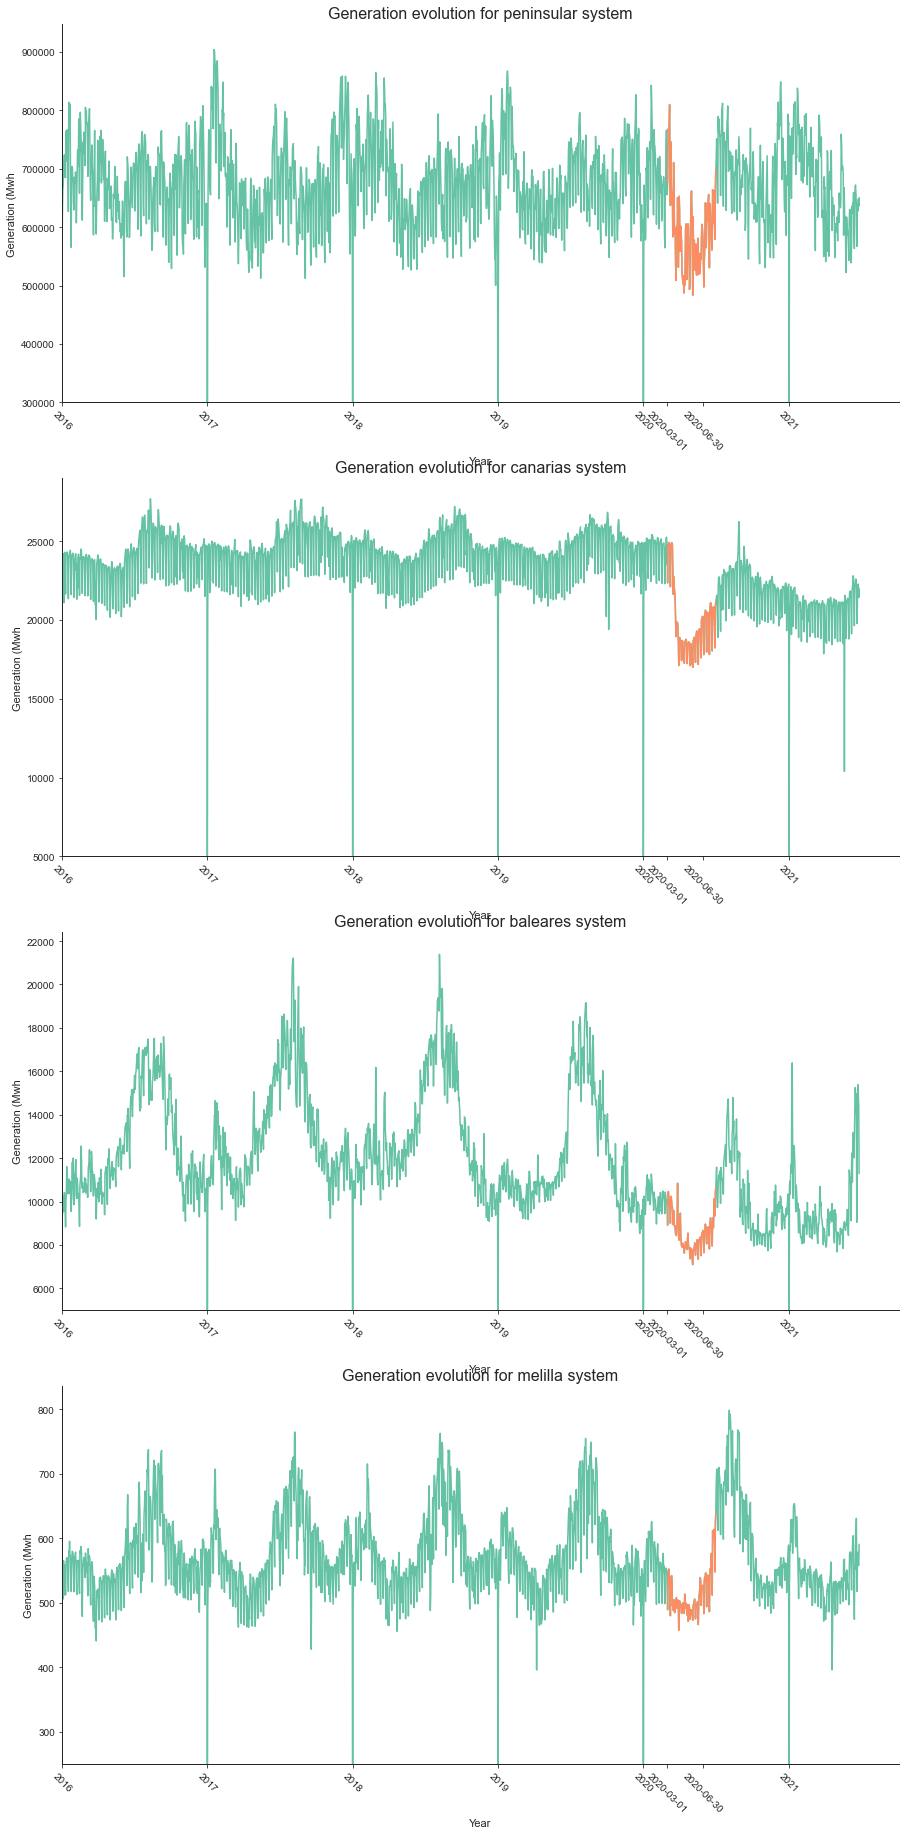

In [11]:
sns_generacion(df_ree_renov,['Generación total'],Renovable_system,'2020-03-01','2020-06-30')

It can be seen how the temporality for the baleares and melilla systemss very strong, while for the peninsular and the canarias systems it is much lower, so the date is going to be a important feature in our model.

In addition, the decrease in electricity generation is clearly seen for the period of COVID-19 lockdown

For than I delete the date from 2021-03-15 to 2021-06-28 due to covid lockdown

In [12]:
df_ree_filtered=df_ree_renov[(df_ree_renov['fecha']<'2020-03-15') | (df_ree_renov['fecha']>='2020-06-28')]

# Weather features analysis

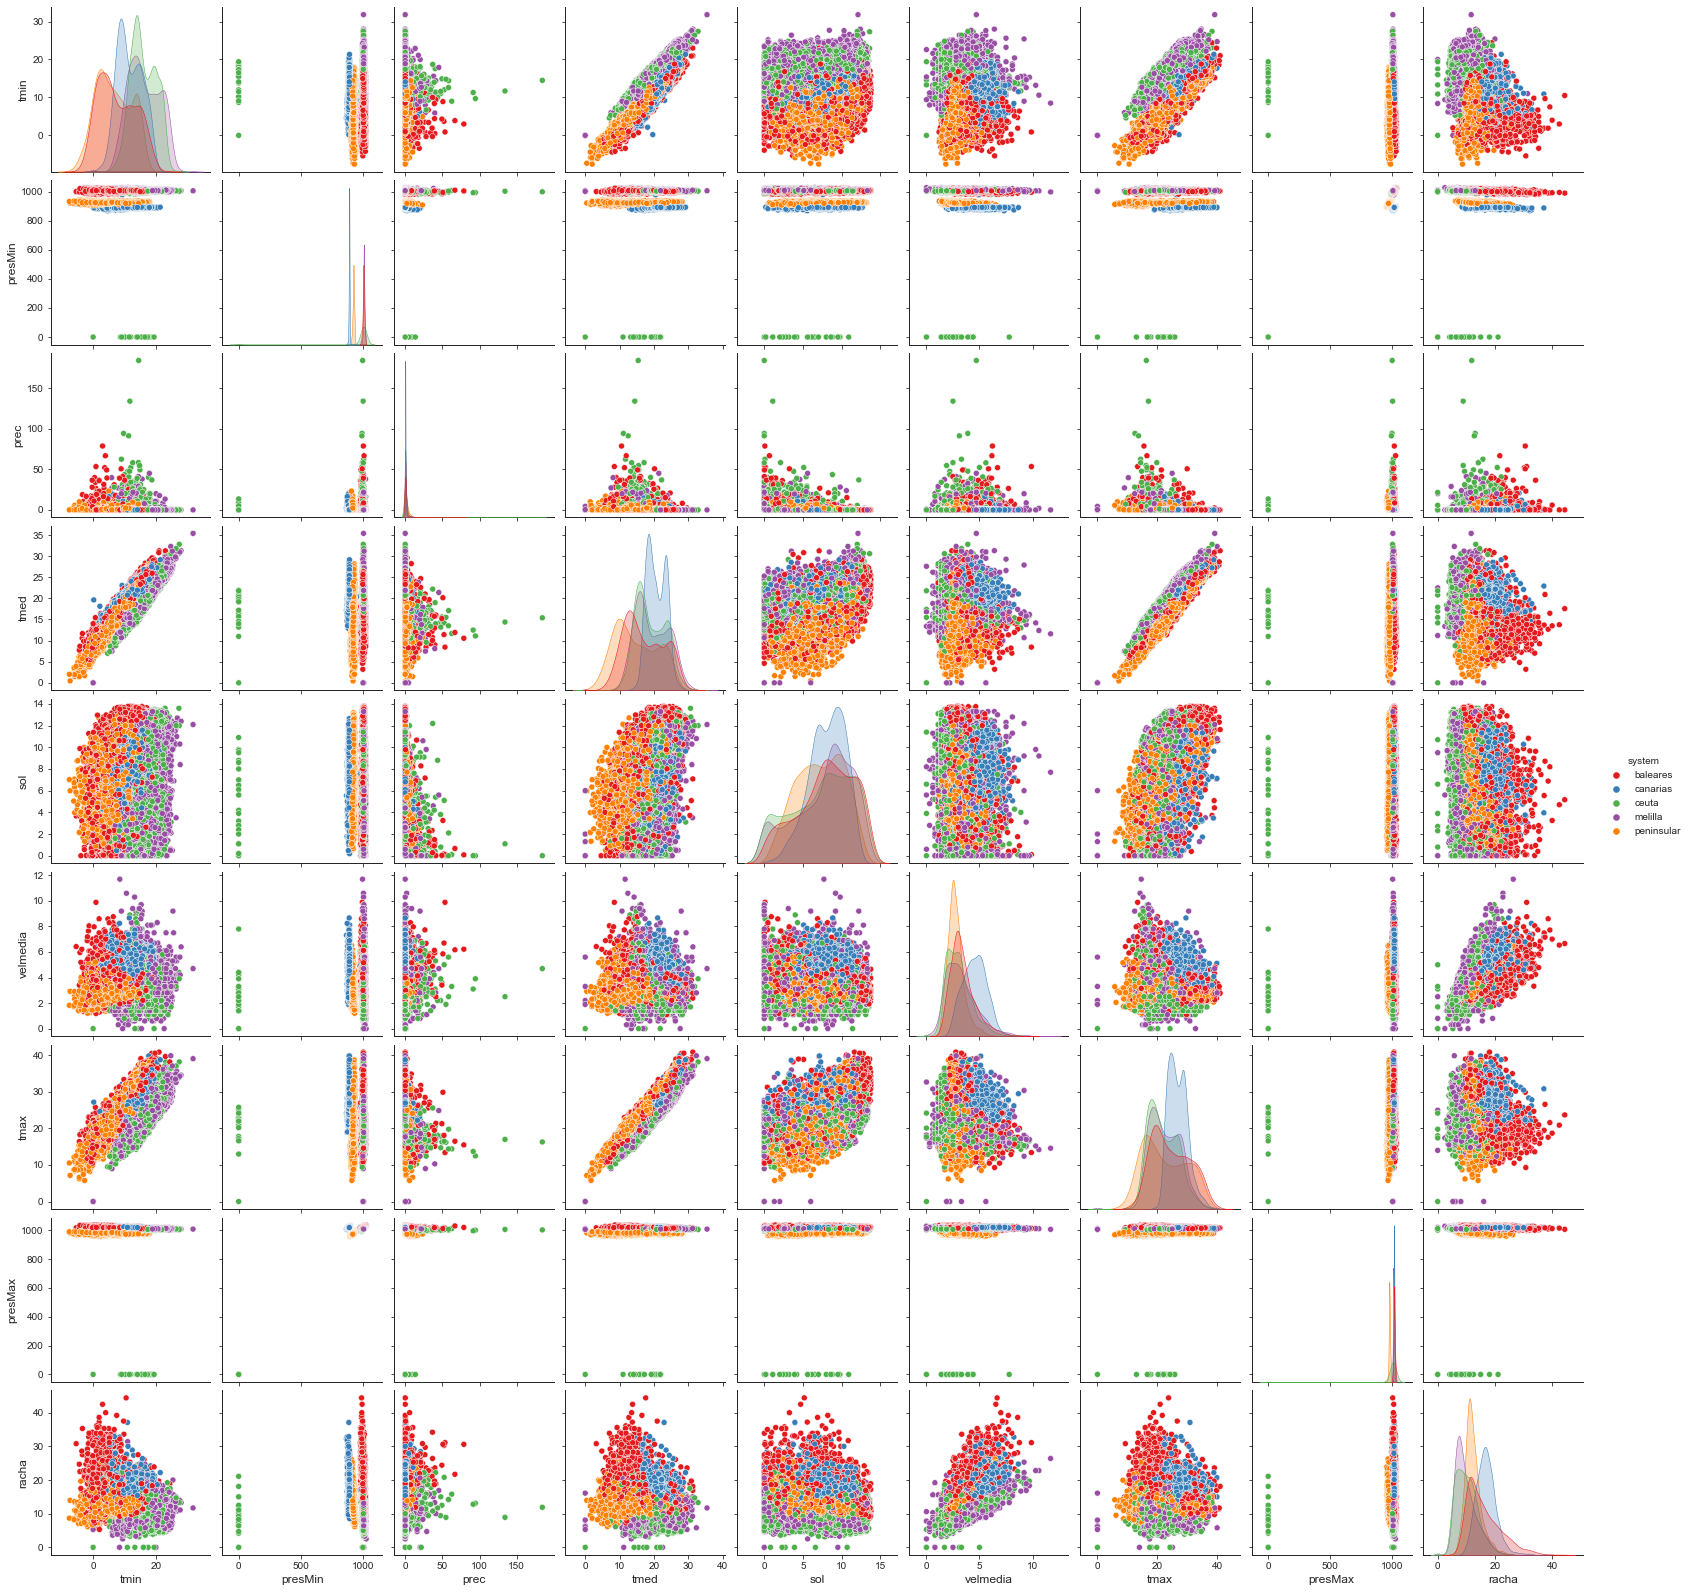

In [13]:
sns.pairplot(data=df_weather_system,hue='system');

Vemos que en funcion de la presion (minima y maxima):
    - Hay 2 grupos muy claramente diferenciandos para temperaturas , velocidad del viento y horas de sol.
    - Y 2 grupos pero no tan claramente diferenciados para las precipitaciones
    - Se ve claramente un dato outlier para precipitaciones y otro para temperatura minima

## Precipitacions

In [282]:
df_weather_system['prec'].describe()

count    9960.000000
mean        1.339078
std         4.976102
min         0.000000
25%         0.000000
50%         0.000000
75%         0.466241
max       184.400000
Name: prec, dtype: float64

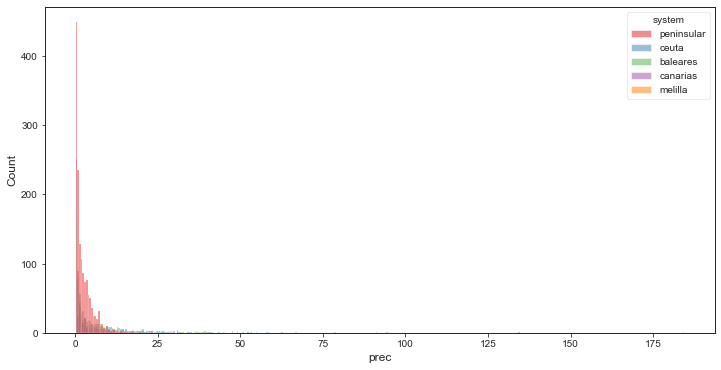

In [283]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.histplot(data=df_weather_system[df_weather_system['prec']>0.1],x='prec',hue='system',alpha=0.5);

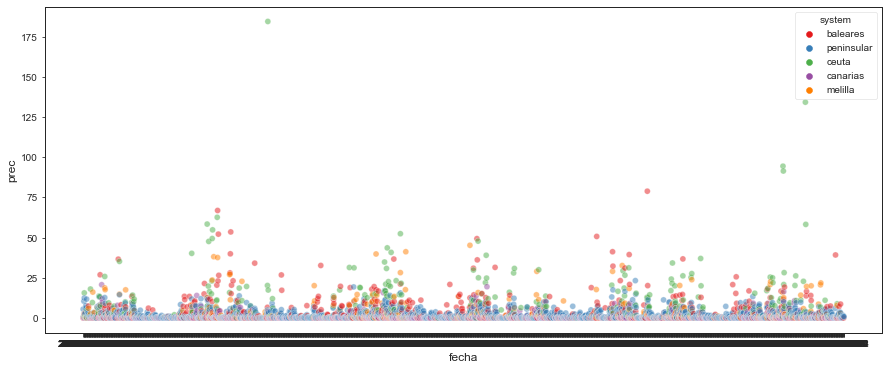

In [284]:
f,ax=plt.subplots(1,1)
f.set_size_inches(15,6)
ax=sns.scatterplot(data=df_weather_system[df_weather_system['prec']>0],y='prec',x='fecha',hue='system',alpha=0.5);

## Hours of sun

In [285]:
df_weather_system['sol'].describe()

count    9960.000000
mean        7.649609
std         3.366652
min         0.000000
25%         5.400000
50%         8.100000
75%        10.233333
max        13.783333
Name: sol, dtype: float64

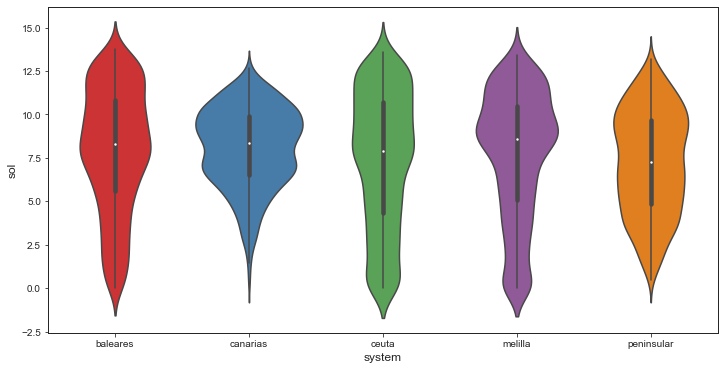

In [286]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='sol', data=df_weather_system);

## Temperature

In [287]:
df_weather_system['tmax'].describe()

count    9960.000000
mean       23.579097
std         5.864707
min         0.000000
25%        18.900000
50%        23.649468
75%        27.900000
max        40.900000
Name: tmax, dtype: float64

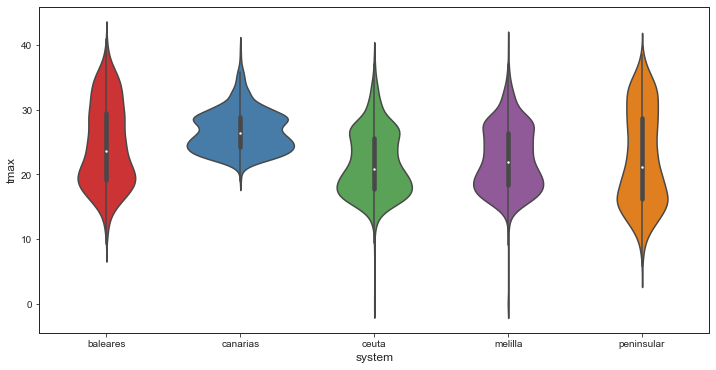

In [288]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='tmax', data=df_weather_system);

In [289]:
df_weather_system['tmin'].describe()

count    9960.000000
mean       11.493483
std         6.355537
min        -7.570213
25%         7.200000
50%        12.000000
75%        15.800000
max        31.800000
Name: tmin, dtype: float64

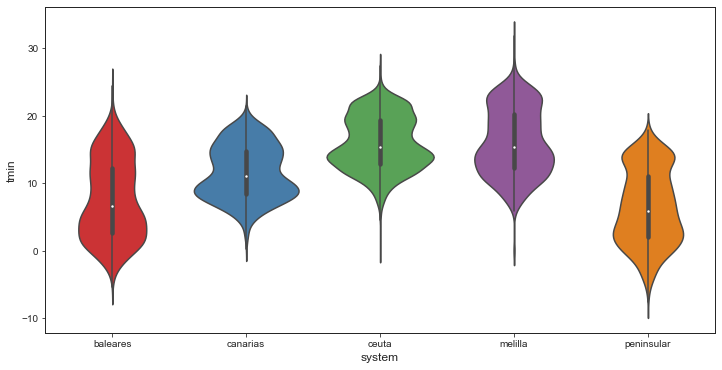

In [290]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='tmin', data=df_weather_system);

## Wind

In [291]:
df_weather_system['velmedia'].describe()

count    9960.000000
mean        3.393684
std         1.336051
min         0.000000
25%         2.466614
50%         3.100000
75%         4.200000
max        11.700000
Name: velmedia, dtype: float64

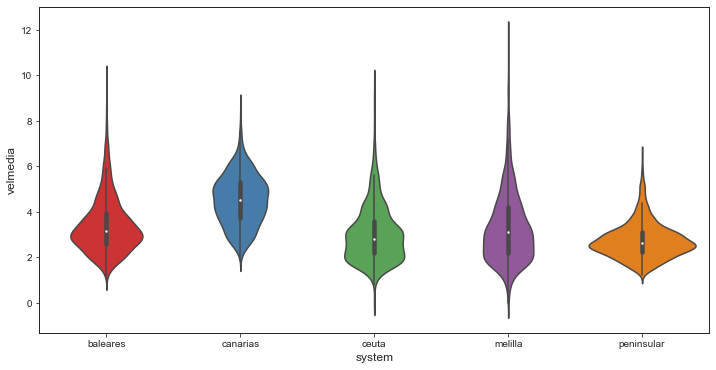

In [292]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='velmedia', data=df_weather_system);

In [293]:
df_weather_system['racha'].describe()

count    9960.000000
mean       12.995824
std         5.037568
min         0.000000
25%         9.469681
50%        12.200000
75%        16.000000
max        44.400000
Name: racha, dtype: float64

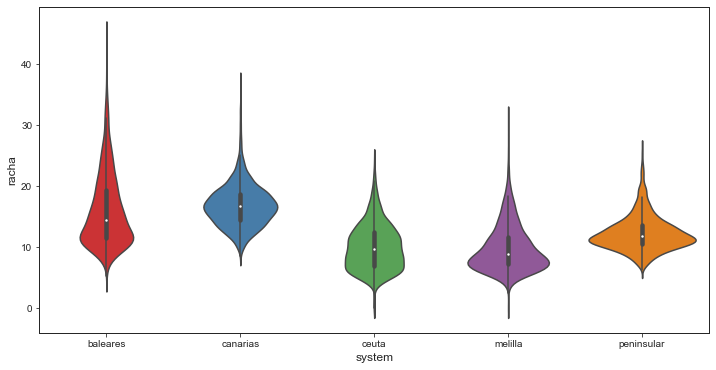

In [294]:
f,ax=plt.subplots(1,1)
f.set_size_inches(12,6)
ax=sns.violinplot(x='system',y='racha', data=df_weather_system);

# Outliers

Vamos a buscar los outlier de precipitaciones y temperatura minima, por si fuesen datos erroneos.



## Outlier de Precipitaciones


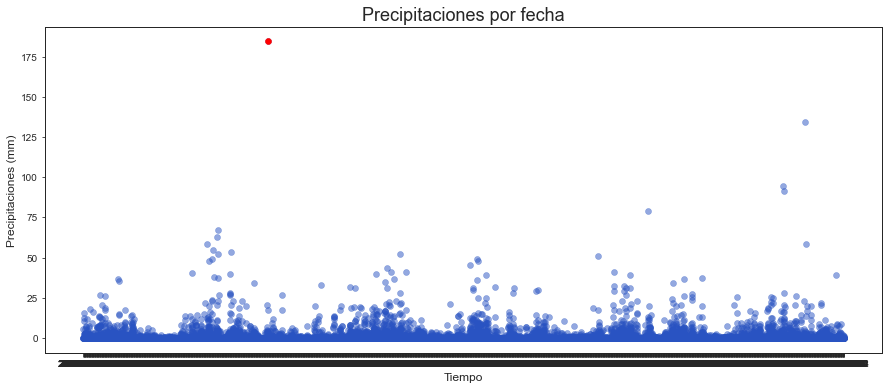

In [295]:

maxprec_mm=df_weather_system[df_weather_system['prec']==df_weather_system['prec'].max()]['prec']
maxprec_fec=df_weather_system[df_weather_system['prec']==df_weather_system['prec'].max()]['fecha']
plt.figure(figsize=(15,6))
plt.scatter(df_weather_system['fecha'],df_weather_system['prec'],c='#2953C2',alpha=0.5)
plt.scatter(maxprec_fec,maxprec_mm,c='r')
plt.title('Precipitaciones por fecha',fontsize=18)
plt.xlabel('Tiempo')
plt.ylabel('Precipitaciones (mm)')
plt.minorticks_off();


In [296]:
df_weather_system[df_weather_system['prec']==df_weather_system['prec'].max()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
2417,2017-04-28,ceuta,0,4,14.5,998.7,184.4,15.4,0.0,4.7,16.3,1002.7,11.9


## Outliers de Temperatura mínima

El 02-08-2020 tenemos un dato máximo en la serie histórica de temperaturas minimas de 31,8 grados en la estación de MELILLA

In [297]:
tminGrouped=df_weather_system.groupby('fecha')['tmin'].mean().reset_index()
maxtmin_celsius=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].max()]['tmin']
maxtmin_fec=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].max()]['fecha']
mintmin_celsius=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].min()]['tmin']
mintmin_fec=df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].min()]['fecha']

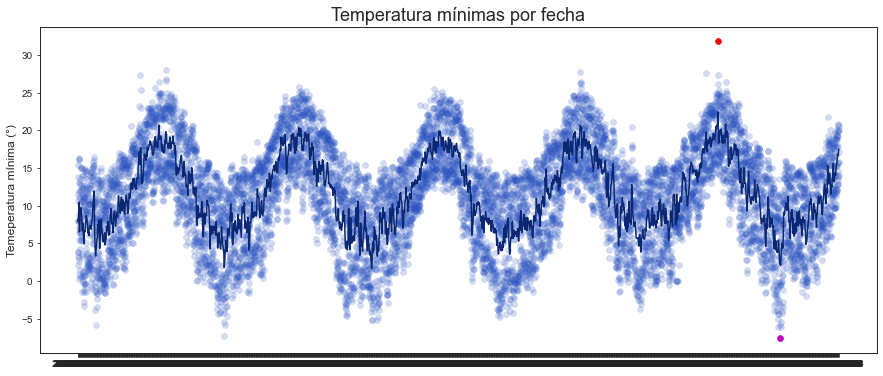

In [298]:

plt.figure(figsize=(15,6))
plt.plot(tminGrouped['fecha'],tminGrouped['tmin'],c='#0A2774')
plt.scatter(df_weather_system['fecha'],df_weather_system['tmin'],c='#2953C2',alpha=0.2)
plt.scatter(maxtmin_fec,maxtmin_celsius,c='r')
plt.scatter(mintmin_fec,mintmin_celsius,c='m')
plt.title('Temperatura mínimas por fecha',fontsize=18)
plt.ylabel('Tiempo')
plt.ylabel('Temeperatura mínima (°)');



In [299]:
df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].max()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
8378,2020-08-02,melilla,0,6,31.8,1005.7,0.0,35.4,12.1,4.7,39.1,1008.3,11.7


In [300]:
df_weather_system[df_weather_system['tmin']==df_weather_system['tmin'].min()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
9194,2021-01-12,peninsular,0,1,-7.570213,932.525532,0.022589,2.022069,7.020053,1.827664,10.544681,989.948936,8.670213


## Outliers de Temperatura máxima

In [301]:
tmaxGrouped=df_weather_system.groupby('fecha')['tmax'].mean().reset_index()
maxtmax_celsius=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].max()]['tmax']
maxtmax_fec=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].max()]['fecha']
mintmax_celsius=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].min()]['tmax']
mintmax_fec=df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].min()]['fecha']

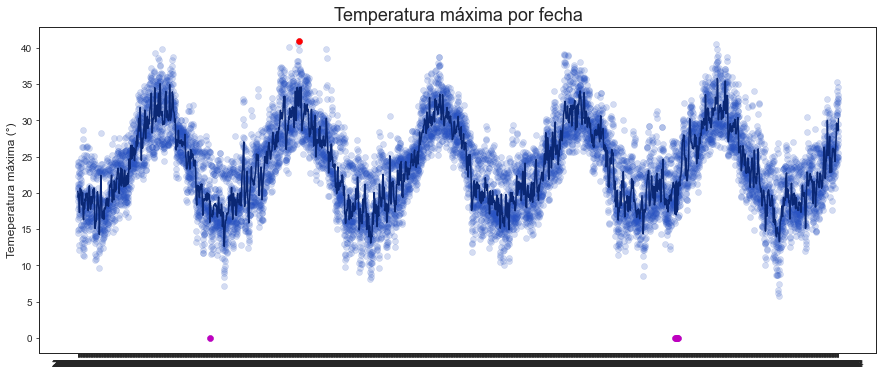

In [302]:
plt.figure(figsize=(15,6))
plt.plot(tmaxGrouped['fecha'],tmaxGrouped['tmax'],c='#0A2774')
plt.scatter(df_weather_system['fecha'],df_weather_system['tmax'],c='#2953C2',alpha=0.2)
plt.scatter(maxtmax_fec,maxtmax_celsius,c='r')
plt.scatter(mintmax_fec,mintmax_celsius,c='m')
plt.title('Temperatura máxima por fecha',fontsize=18)
plt.ylabel('Tiempo')
plt.ylabel('Temeperatura máxima (°)');


In [303]:
df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].max()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
2900,2017-08-03,baleares,0,3,21.0,1003.6,0.0,31.28,11.633333,2.77,40.9,1016.4,18.1


In [304]:
df_weather_system[df_weather_system['tmax']==df_weather_system['tmax'].min()]

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
1732,2016-12-12,ceuta,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7823,2020-04-13,melilla,0,0,0.0,1001.9,1.0,0.0,2.0,1.9,0.0,1005.6,6.4
7833,2020-04-15,melilla,0,2,0.0,1004.5,0.0,0.0,6.0,3.3,0.0,1011.8,8.1
7843,2020-04-17,melilla,0,4,0.0,1008.4,0.0,0.0,0.0,2.2,0.0,1010.8,6.1
7848,2020-04-18,melilla,0,5,0.0,1004.9,4.4,0.0,0.0,1.9,0.0,1009.1,5.3
7853,2020-04-19,melilla,0,6,0.0,1001.7,0.4,0.0,1.3,5.6,0.0,1006.2,16.1


# Correlation Matrix

In [305]:
features_columns=['Holiday','weekday','tmin','tmed','tmax','prec','sol','velmedia','racha','presMax','presMin']
df_Matrix_Corr=df_weather_system[features_columns].corr()

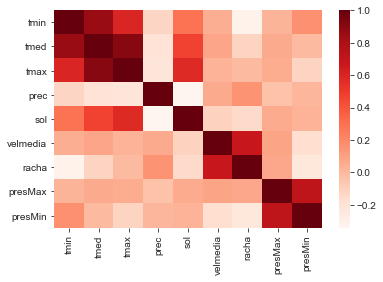

In [306]:
sns.heatmap(df_Matrix_Corr,cmap='Reds');

In [307]:
df_Matrix_Corr

,tmin,tmed,tmax,prec,sol,velmedia,racha,presMax,presMin
tmin,1.000000,0.861894,0.599205,-0.121157,0.288536,0.048719,-0.313343,0.023976,0.167520
tmed,0.861894,1.000000,0.908930,-0.190148,0.475156,0.085610,-0.119845,0.063569,-0.002920
tmax,0.599205,0.908930,1.000000,-0.212737,0.579667,0.026509,-0.000746,0.052660,-0.112294
prec,-0.121157,-0.190148,-0.212737,1.000000,-0.341196,0.063641,0.159817,-0.035045,0.018802
sol,0.288536,0.475156,0.579667,-0.341196,1.000000,-0.106090,-0.145863,0.057532,0.027393
velmedia,0.048719,0.085610,0.026509,0.063641,-0.106090,1.000000,0.684285,0.092813,-0.165299
racha,-0.313343,-0.119845,-0.000746,0.159817,-0.145863,0.684285,1.000000,0.074465,-0.224448
presMax,0.023976,0.063569,0.052660,-0.035045,0.057532,0.092813,0.074465,1.000000,0.726678
presMin,0.167520,-0.002920,-0.112294,0.018802,0.027393,-0.165299,-0.224448,0.726678,1.000000


# Preprocesing 


In [308]:
df_ree=df_ree_filtered[df_ree_filtered['Renov_norenov']!='Generación total']
df_ree['Generacion_Mwh']=df_ree['Generacion_Mwh'].astype(float)

In [309]:
df_ree_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73365 entries, 0 to 836
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Generacion_Mwh  73365 non-null  float64
 1   Tecnologia      73365 non-null  object 
 2   Renov_norenov   73365 non-null  object 
 3   system          73365 non-null  object 
 4   fecha           73365 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.4+ MB


In [310]:
df_ree.reset_index(inplace=True,drop=True) #to join by index before encoding

In [311]:
df_weather_system['Holiday']=df_weather_system['Holiday'].astype(int)
df_weather_system['weekday']=df_weather_system['weekday'].astype(int)

In [312]:
df_weather_system['year']=df_weather_system['fecha'].str.slice(0,4).astype(int)
df_weather_system['month']=df_weather_system['fecha'].str.slice(5,7).astype(int)
df_weather_system['day']=df_weather_system['fecha'].str.slice(8,10).astype(int)

## Encoder for REE categorical variables

In [313]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder().fit(df_ree[['Tecnologia','Renov_norenov']])

df_transform=enc.transform(df_ree[['Tecnologia','Renov_norenov']])

df_onehot =  pd.DataFrame(df_transform.todense(), columns= enc.get_feature_names())

df_ree_onehot=pd.merge(df_ree[['Generacion_Mwh','fecha','system']],df_onehot,how='inner',left_index=True,right_index=True)

In [314]:
df_ree_onehot.head()

,Generacion_Mwh,fecha,system,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable
0,29281.000,2016-01-01,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35544.881,2016-01-02,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,35910.705,2016-01-03,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,65268.886,2016-01-04,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,79718.832,2016-01-05,peninsular,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [315]:
target_percentage=enc.get_feature_names()

df_ree_target=target_preprocesing(df_ree_onehot,target_percentage, ['system'])

In [316]:
df_ree_target.head()

,system,fecha,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable
0,baleares,2016-01-01,8814.678,0.343993,0.258372,0.007846,0.001254,0.0,0.0,0.0,0.115979,0.0,0.000155,0.055027,0.055027,0.016359,0.0,0.145988,0.0,0.0,0.927205,0.072795
1,baleares,2016-01-02,9435.611,0.346457,0.257906,0.009564,0.002847,0.0,0.0,0.0,0.126039,0.0,0.000247,0.048582,0.048582,0.020613,0.0,0.139162,0.0,0.0,0.927710,0.072290
2,baleares,2016-01-03,9497.967,0.368112,0.245120,0.009788,0.001577,0.0,0.0,0.0,0.124939,0.0,0.000000,0.048558,0.048558,0.011936,0.0,0.141412,0.0,0.0,0.937929,0.062071
3,baleares,2016-01-04,10236.225,0.329239,0.283662,0.012230,0.000843,0.0,0.0,0.0,0.134589,0.0,0.000312,0.044277,0.044277,0.005257,0.0,0.145313,0.0,0.0,0.949311,0.050689
4,baleares,2016-01-05,10213.430,0.317729,0.288860,0.012368,0.001129,0.0,0.0,0.0,0.126170,0.0,0.000429,0.047413,0.047413,0.010349,0.0,0.148140,0.0,0.0,0.940681,0.059319


In [317]:
df_ree_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7564 entries, 0 to 7563
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   system                     7564 non-null   object 
 1   fecha                      7564 non-null   object 
 2   Generacion_Mwh             7564 non-null   float64
 3   x0_Carbón                  7564 non-null   float64
 4   x0_Ciclo combinado         7564 non-null   float64
 5   x0_Cogeneración            7564 non-null   float64
 6   x0_Eólica                  7564 non-null   float64
 7   x0_Fuel + Gas              7564 non-null   float64
 8   x0_Hidroeólica             7564 non-null   float64
 9   x0_Hidráulica              7564 non-null   float64
 10  x0_Motores diésel          7564 non-null   float64
 11  x0_Nuclear                 7564 non-null   float64
 12  x0_Otras renovables        7564 non-null   float64
 13  x0_Residuos no renovables  7564 non-null   float

In [318]:
df_weather_system.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9960 entries, 0 to 9959
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     9960 non-null   object 
 1   system    9960 non-null   object 
 2   Holiday   9960 non-null   int32  
 3   weekday   9960 non-null   int32  
 4   tmin      9960 non-null   float64
 5   presMin   9960 non-null   float64
 6   prec      9960 non-null   float64
 7   tmed      9960 non-null   float64
 8   sol       9960 non-null   float64
 9   velmedia  9960 non-null   float64
 10  tmax      9960 non-null   float64
 11  presMax   9960 non-null   float64
 12  racha     9960 non-null   float64
 13  year      9960 non-null   int32  
 14  month     9960 non-null   int32  
 15  day       9960 non-null   int32  
dtypes: float64(9), int32(5), object(2)
memory usage: 1.4+ MB


In [319]:
df_ree_weather=pd.merge(df_weather_system,
                            df_ree_target, 
                             on=['fecha','system'])

In [320]:
df_ree_weather.head(10)

,fecha,system,Holiday,weekday,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha,year,month,day,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x1_No-Renovable,x1_Renovable
0,2016-01-01,baleares,1,4,3.300000,1009.300000,0.022222,13.022222,1.940000,2.366667,18.900000,1024.900000,14.200000,2016,1,1,8814.678,0.343993,0.258372,0.007846,0.001254,0.0,0.000000,0.000000,0.115979,0.000000,0.000155,0.055027,0.055027,0.016359,0.000000,0.145988,0.000000,0.000000,0.927205,0.072795
1,2016-01-01,canarias,1,4,7.900000,894.700000,0.000000,18.040000,9.266667,2.781667,24.250000,1025.450000,10.400000,2016,1,1,20220.015,0.000000,0.352333,0.000000,0.018968,0.0,0.000584,0.000453,0.298062,0.000000,0.001335,0.000000,0.000000,0.034486,0.000000,0.007941,0.285837,0.000000,0.944174,0.055826
2,2016-01-01,melilla,1,4,10.600000,1016.600000,0.000000,15.500000,9.100000,1.700000,20.400000,1019.900000,5.600000,2016,1,1,479.011,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.933300,0.000000,0.000000,0.033199,0.033199,0.000303,0.000000,0.000000,0.000000,0.000000,0.966499,0.033501
3,2016-01-01,peninsular,1,4,3.817021,921.165957,5.477102,10.207533,2.231907,3.189763,16.440426,984.380851,16.361702,2016,1,1,537090.081,0.045432,0.090214,0.078047,0.371330,0.0,0.000000,0.054518,0.000000,0.303013,0.013348,0.007165,0.002196,0.015230,0.001295,0.000000,0.000000,0.018213,0.542084,0.457916
4,2016-01-02,baleares,0,5,3.900000,1006.400000,0.000000,13.588889,3.140000,4.488889,20.700000,1021.200000,23.300000,2016,1,2,9435.611,0.346457,0.257906,0.009564,0.002847,0.0,0.000000,0.000000,0.126039,0.000000,0.000247,0.048582,0.048582,0.020613,0.000000,0.139162,0.000000,0.000000,0.927710,0.072290
5,2016-01-02,canarias,0,5,8.000000,895.150000,0.000000,18.325000,9.000000,3.068889,23.900000,1026.300000,10.150000,2016,1,2,22942.014,0.000000,0.332830,0.000000,0.016753,0.0,0.000592,0.000420,0.280632,0.000000,0.001153,0.000000,0.000000,0.030013,0.000000,0.017682,0.319924,0.000000,0.951068,0.048932
6,2016-01-02,melilla,0,5,11.600000,1016.400000,0.000000,17.000000,7.900000,2.500000,22.400000,1018.000000,9.700000,2016,1,2,520.350,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.939485,0.000000,0.000000,0.030119,0.030119,0.000277,0.000000,0.000000,0.000000,0.000000,0.969604,0.030396
7,2016-01-02,peninsular,0,5,2.136170,922.636170,0.791592,8.648970,4.436543,3.055813,14.544681,982.923404,14.508511,2016,1,2,619096.702,0.046522,0.074666,0.085865,0.380221,0.0,0.000000,0.057414,0.000000,0.273971,0.012676,0.006618,0.001840,0.018983,0.002035,0.000000,0.000000,0.039188,0.526831,0.473169
8,2016-01-03,baleares,0,6,2.700000,996.900000,0.833333,10.711111,0.800000,4.444444,17.800000,1019.800000,26.100000,2016,1,3,9497.967,0.368112,0.245120,0.009788,0.001577,0.0,0.000000,0.000000,0.124939,0.000000,0.000000,0.048558,0.048558,0.011936,0.000000,0.141412,0.000000,0.000000,0.937929,0.062071
9,2016-01-03,canarias,0,6,8.800000,895.650000,0.005000,18.271111,8.775000,3.071111,23.700000,1025.900000,11.250000,2016,1,3,22186.025,0.000000,0.341117,0.000000,0.024019,0.0,0.000943,0.000437,0.284953,0.000000,0.001234,0.000000,0.000000,0.031254,0.000000,0.012332,0.303712,0.000000,0.942114,0.057886


In [321]:
df_ree_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7548 entries, 0 to 7547
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fecha                      7548 non-null   object 
 1   system                     7548 non-null   object 
 2   Holiday                    7548 non-null   int32  
 3   weekday                    7548 non-null   int32  
 4   tmin                       7548 non-null   float64
 5   presMin                    7548 non-null   float64
 6   prec                       7548 non-null   float64
 7   tmed                       7548 non-null   float64
 8   sol                        7548 non-null   float64
 9   velmedia                   7548 non-null   float64
 10  tmax                       7548 non-null   float64
 11  presMax                    7548 non-null   float64
 12  racha                      7548 non-null   float64
 13  year                       7548 non-null   int32

# Save data to pickle

In [322]:
df_ree_weather.to_pickle(Ing_AEMET.path_Data+"2_Wheater_ree.pkl")

# Chart

In [344]:
df_ree_filtered.reset_index(inplace=True,drop=True)

In [345]:
df_renov=df_ree_filtered.groupby(['fecha','system','Renov_norenov'],as_index=False)['Generacion_Mwh'].sum()
df_renov=df_renov[df_renov['Renov_norenov']=='Renovable']
df_renov['Tecnologia']='Renovable'
df_renov.reset_index(inplace=True,drop=True)

In [346]:
df_renov_roll=df_renov.groupby(['system','Tecnologia','Renov_norenov'])['Generacion_Mwh'].rolling(7,7).mean().reset_index()
df_renov_roll.set_index('level_3',inplace=True)

In [347]:
df_renov_roll=pd.merge(df_renov[['fecha']],df_renov_roll,how='left',left_index=True,right_index=True)
df_renov_roll[df_renov_roll['system']=='peninsular'].tail()

,fecha,system,Tecnologia,Renov_norenov,Generacion_Mwh
7447,2021-05-20,peninsular,Renovable,Renovable,375658.215214
7451,2021-05-21,peninsular,Renovable,Renovable,368367.682643
7455,2021-05-22,peninsular,Renovable,Renovable,347778.611357
7459,2021-05-23,peninsular,Renovable,Renovable,318342.051286
7463,2021-05-24,peninsular,Renovable,Renovable,325884.439429
7467,2021-05-25,peninsular,Renovable,Renovable,317926.519286
7471,2021-05-26,peninsular,Renovable,Renovable,308222.964000
7475,2021-05-27,peninsular,Renovable,Renovable,299199.887714
7479,2021-05-28,peninsular,Renovable,Renovable,284319.489357
7483,2021-05-29,peninsular,Renovable,Renovable,282611.157143


In [348]:
df_rolling=df_ree_filtered.groupby(['system','Tecnologia','Renov_norenov'])['Generacion_Mwh'].rolling(7,7).mean().reset_index()
df_rolling.set_index('level_3',inplace=True)

,system,Tecnologia,Renov_norenov,Generacion_Mwh
level_3,,,,
8424,baleares,Carbón,No-Renovable,NaN
8425,baleares,Carbón,No-Renovable,NaN
8426,baleares,Carbón,No-Renovable,NaN
8427,baleares,Carbón,No-Renovable,NaN
8428,baleares,Carbón,No-Renovable,NaN
...,...,...,...,...
67169,peninsular,Turbinación bombeo,No-Renovable,3170.000000
67170,peninsular,Turbinación bombeo,No-Renovable,3833.828571
67171,peninsular,Turbinación bombeo,No-Renovable,3240.471429


In [349]:
df_rolling=pd.merge(df_ree_filtered[['fecha']],df_rolling,how='left',left_index=True,right_index=True)
df_rolling[df_rolling['system']=='peninsular'].tail()

,fecha,system,Tecnologia,Renov_norenov,Generacion_Mwh
69003,2021-05-20,peninsular,Generación total,Generación total,657820.677714
69004,2021-05-21,peninsular,Generación total,Generación total,645413.971857
69005,2021-05-22,peninsular,Generación total,Generación total,625415.559714
69006,2021-05-23,peninsular,Generación total,Generación total,601151.768429
69007,2021-05-24,peninsular,Generación total,Generación total,605480.839429
69008,2021-05-25,peninsular,Generación total,Generación total,598239.405714
69009,2021-05-26,peninsular,Generación total,Generación total,592409.903286
69010,2021-05-27,peninsular,Generación total,Generación total,589435.728429
69011,2021-05-28,peninsular,Generación total,Generación total,585584.823429
69012,2021-05-29,peninsular,Generación total,Generación total,586426.361714


In [353]:
df_rolling=df_rolling.append(df_renov_roll)
df_rolling['year']=' '+df_rolling['fecha'].str.slice(0,4)

In [453]:
import altair as alt

alt.data_transformers.disable_max_rows()

select_box_sys = alt.binding_select(options=list(df_rolling['system'].unique()))

selection_sys = alt.selection_single(name='REE',
                                     fields=['system'],
                                     bind=select_box_sys,
                                     init={'system':'peninsular'})


select_radio_year = alt.binding_radio(options=list(df_rolling['year'].unique()))

selection_year = alt.selection_single(name='Choose',
                                     fields=['year'],
                                     bind=select_radio_year,
                                     init={'year':max(df_rolling['year'])})

nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['fecha'], empty='none')

selectors = alt.Chart(df_rolling).mark_point().encode(
    alt.X('fecha'),
    opacity=alt.value(0)
).add_selection(
    nearest
).transform_filter(
    selection_sys 
).transform_filter(
    selection_year
)


bar=alt.Chart(df_rolling[df_rolling['Renov_norenov']=='Generación total']).mark_area(color='#85C1E9').encode(
    alt.X('fecha' ,axis=alt.Axis(values=x_labels, labelAngle=0)),
    alt.Y('Generacion_Mwh:Q')
    
).add_selection(
    selection_sys,selection_year
).transform_filter(
    selection_sys
).transform_filter(
    selection_year
).properties(
    width=1000,
    height=300

)


bar_renov=alt.Chart(df_rolling[df_rolling['Tecnologia']=='Renovable']).mark_area().encode(
    alt.X('fecha'),
    alt.Y('Generacion_Mwh:Q'),
    color=alt.Color('Tecnologia', scale=alt.Scale(domain=domain, range=range_))
).transform_filter(
    selection_sys  
).transform_filter(
    selection_year
)

point_renov=bar_renov.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
).transform_filter(
    selection_sys  
).transform_filter(
    selection_year
)


text_renov = bar_renov.mark_text(align='left', dx=5, dy=-5,color='#212F3C').encode(
    text=alt.condition(nearest, 'Generacion_Mwh',alt.value(' ')),
)

# Draw a rule at the location of the selection
rules = alt.Chart(df_rolling).mark_rule(color='gray').encode(
    x='fecha',
).transform_filter(
    nearest
)

bar_solar=alt.Chart(df_rolling[df_rolling['Tecnologia']=='Solar fotovoltaica']).mark_area(opacity=.8,color='#D35400').encode(
    alt.X('fecha'),
    alt.Y('Generacion_Mwh:Q')
).transform_filter(
    selection_sys 
).transform_filter(
    selection_year
)

text_solar = bar_solar.mark_text(align='left', dx=5, dy=-5,color='#212F3C').encode(
    text=alt.condition(nearest, 'Generacion_Mwh',alt.value(' ')),
)

bar_eolica=alt.Chart(df_rolling[df_rolling['Tecnologia']=='Eólica']).mark_area(color='#F7DC6F').encode(
    alt.X('fecha'),
    alt.Y('Generacion_Mwh:Q')
).transform_filter(
    selection_sys 
).transform_filter(
    selection_year
)

text_eolica = bar_eolica.mark_text(align='left', dx=5, dy=-5,color='#212F3C').encode(
    text=alt.condition(nearest, 'Generacion_Mwh',alt.value(' ')),
)




alt.layer(bar,bar_renov,bar_eolica,bar_solar,selectors,rules,text_renov,text_eolica,text_solar)

alt.LayerChart(...)

In [467]:
def chart_altair(df,system_ini='peninsular'):

    x_labels = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
                '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2016-12-31',
                '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
                '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2017-12-31',
                '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
                '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2018-12-31',
                '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
                '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01', '2019-12-31',
                '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
                '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01', '2020-12-31',
                '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
                '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01', '2021-12-31']

    domain = ['Generación total', 'Renovable', 'Solar fotovoltaica', 'Eólica']
    range_ = ['#85C1E9', '#239B56', '#D35400', '#F7DC6F']
    
    select_box_sys = alt.binding_select(options=list(df['system'].unique()))

    selection_sys = alt.selection_single(name='REE',
                                         fields=['system'],
                                         bind=select_box_sys,
                                         init={'system':system_ini})


    select_radio_year = alt.binding_radio(options=list(df['year'].unique()))

    selection_year = alt.selection_single(name='Choose',
                                         fields=['year'],
                                         bind=select_radio_year,
                                         init={'year':max(df['year'])})

    nearest = alt.selection(type='single', nearest=True, on='mouseover',
                            fields=['fecha'], empty='none')

    selectors = alt.Chart(df).mark_point().encode(
        alt.X('fecha'),
        opacity=alt.value(0)
    ).add_selection(
        nearest
    ).transform_filter(
        selection_sys 
    ).transform_filter(
        selection_year
    )

    bar=alt.Chart(df[df['Renov_norenov']=='Generación total']).mark_area(color='#85C1E9').encode(
        alt.X('fecha' ,axis=alt.Axis(values=x_labels, labelAngle=0)),
        alt.Y('Generacion_Mwh:Q')

    ).add_selection(
        selection_sys,selection_year
    ).transform_filter(
        selection_sys
    ).transform_filter(
        selection_year
    ).properties(
        width=1000,
        height=300
    )
    

    bar_renov=alt.Chart(df[df['Tecnologia']=='Renovable']).mark_area().encode(
        alt.X('fecha'),
        alt.Y('Generacion_Mwh:Q'),
        color=alt.Color('Tecnologia', scale=alt.Scale(domain=domain, range=range_))
    ).transform_filter(
        selection_sys  
    ).transform_filter(
        selection_year
    )

    point_renov=bar_renov.mark_point().encode(
        opacity=alt.condition(nearest, alt.value(1), alt.value(0))
    ).transform_filter(
        selection_sys  
    ).transform_filter(
        selection_year
    )

    text_renov = bar_renov.mark_text(align='left', dx=5, dy=-5,color='#212F3C').encode(
        text=alt.condition(nearest, 'Generacion_Mwh',alt.value(' '))
    )


    rules = alt.Chart(df).mark_rule(color='gray').encode(
        x='fecha',
    ).transform_filter(
        nearest
    )

    bar_solar=alt.Chart(df[df['Tecnologia']=='Solar fotovoltaica']).mark_area(opacity=.8,color='#D35400').encode(
        alt.X('fecha'),
        alt.Y('Generacion_Mwh:Q')
    ).transform_filter(
        selection_sys 
    ).transform_filter(
        selection_year
    )

    text_solar = bar_solar.mark_text(align='left', dx=5, dy=-5,color='#212F3C').encode(
        text=alt.condition(nearest, 'Generacion_Mwh',alt.value(' '))
    )

    bar_eolica=alt.Chart(df[df['Tecnologia']=='Eólica']).mark_area(color='#F7DC6F').encode(
        alt.X('fecha'),
        alt.Y('Generacion_Mwh:Q')
    ).transform_filter(
        selection_sys 
    ).transform_filter(
        selection_year
    )

    text_eolica = bar_eolica.mark_text(align='left', dx=5, dy=-5,color='#212F3C').encode(
        text=alt.condition(nearest, 'Generacion_Mwh',alt.value(' '))
    )

    return alt.layer(bar,bar_renov,bar_eolica,bar_solar,selectors,rules,text_renov,text_eolica,text_solar)
    

chart_altair(df_rolling,'peninsular')

alt.LayerChart(...)

## Save data of Chart to pickle

In [398]:
df_rolling.to_pickle(Ing_AEMET.path_Data+"2_Rolling_chart.pkl")